# Introductory Coding Packages

This notebook includes several packages that can be used to support elementary coding acitivities within a Jupyter notebook context.

## A Simple Turtle

The basic Python `turtle` package does not work simply with Jupyter notebooks, and the [`ipython-turtle-widget`](https://github.com/gkvoelkl/ipython-turtle-widget) seems to have stopped working with recent versions of the notebooks. (*It would be a Good Thing to create a standard IPython turtle with Jupyter notebook and Jupyterlab integration.*)

The `calysto` package includes a simple canvas with Python turtle like commands.

In [4]:
%%capture
!pip install calysto

In [16]:
#via https://jupyter.brynmawr.edu/services/public/dblank/Experiments/Calysto%20Turtle%20Graphics.ipynb
from calysto.graphics import *
from calysto.display import display, clear_output
import time
import math

There is some boilerplate that the basic Python `turtle` packages, but we can still write some turtle like programs:

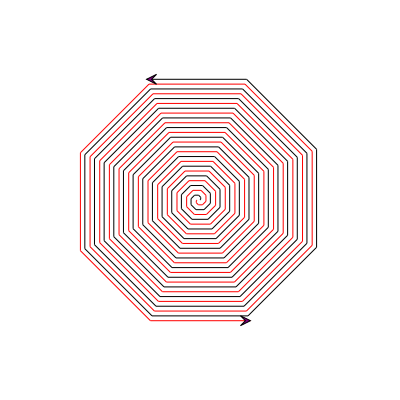

In [5]:
canvas = Canvas(size=(400, 400))
turtle1 = Turtle(canvas, (200, 200), 0)
turtle2 = Turtle(canvas, (197, 200), 180)
turtle2.stroke = Color(255, 0, 0)

for i in range(100):
    turtle1.left(45)
    turtle1.forward(1 + i)
    turtle2.left(45)
    turtle2.forward(1 + i)
    clear_output(wait=True)
    display(canvas)
    time.sleep(.1)
    

We can start to fudge the calysto code to make it a bit simpler:

In [23]:
#tree via https://github.com/psychemedia/showntell/blob/computing/index_computing.ipynb
canvas = Canvas(size=(150, 150))
canvas.clear()

turtle = Turtle(canvas, (100, 100), 0)
left  = turtle.left
right  = turtle.right
forward = turtle.forward
backward = turtle.backward

We can now call on these commands directly, although we still have to manage the canvas.

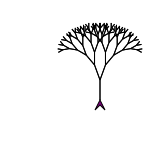

In [24]:
def tree(length):
    """Draw a symmetric tree with a trunk of the given length."""
    # don't draw very small trees
    if length < 5:
        return
    # draw the trunk
    forward(length) 
    # draw the left branch, which is just a smaller tree
    left(20)
    tree(0.8 * length)
    right(20)
    # draw the right branch, which is just a smaller tree
    right(20)
    tree(0.8 * length)
    left(20)
    # return the turtle to the start position
    backward(length)
    clear_output(wait=True)
    display(canvas)
    time.sleep(.2)


display(canvas)

left(90)
tree(20)

## Blocks Style Programming with `Jigsaw`

Many students are introduced to programming through blocks style interfaces. The `jigsaw` magic that is part of the `metakernel` python package provides

In [ ]:
#magics
!pip install metakernel

In [23]:
import metakernel
metakernel.register_ipython_magics()

A newly created programme is saved to a local file related to the workspace name.

Programmes are constructed by dragging programme blocks from the menu on the left onto the main canvas.

(Use the + and - controls on the canvas to set the zoom level.)

Run the programme by clicking the `Run` button just below the canvas.

The `Generate Python Code` buttom will create a notebook code cell underneath the `jigsaw` cell containing python code equivalent to the programme constructed on the canvas.

If several disconnected blocks are placed on the canvas, the code equivalents are generated in top down order.

In [24]:
%jigsaw Python --workspace mynewProgram

<IPython.core.display.Javascript object>

The blocks programme is saved as an .xml file. This means the notebook session can be closed and the blockly programme reopened in the same - or different - notebook at a later date: if an appropriate .xml file with the same name as the workspace exists, the corresponding programme will be loaded onto the canvas.

## Variable Inspector


A variable inspector panel, from the[`varInspector`](../nbextensions/?nbextension=varInspector/main) extension, can be selected from the toolbar to pop up a display showing the variables that have been defined in the current Python session and their values.

Enable the extension and then refresh this notebook webpage to see the toolbar button and pop open the floating variable inspector panel.

## `nbtutor`

The [`nbtutor`](https://github.com/jorisvandenbossche/nbtutor) package provides a simple step tracer / debugger that can visualise the execution of a series of staments in a Jupyter notebook code cell.

In [ ]:
%%capture
#https://github.com/lgpage/nbtutor
!pip install nbtutor

!jupyter nbextension install --overwrite --user --py nbtutor
!jupyter nbextension enable --py nbtutor

In [9]:
%load_ext nbtutor

When you run the following cell, a menu will appear in a toolbar that appears at the top of the cell. Select the `Memory` option and then use the `Next>` button to step through the command exeuction steps.

Hide the cell toolbars from the notebook `View` menu: `View > Cell Toolbar > None`. 

In [34]:
%%nbtutor -r -f
import math

def multi(x, y):
    tmp=x * y
    return y

xy=multi(3, 5)
print(xy)